In [1]:


# using Pkg
# Pkg.add("BenchmarkTools")
# Pkg.add("Distributions")
# Pkg.add("CxxWrap")
# Pkg.add("JLD")
# Pkg.add("ImageIO")
# Pkg.add("CircularArrays")
# Pkg.add("OffsetArrays")
# Pkg.add("TensorOperations")
# Pkg.add("TensorCast")
# Pkg.add("Tullio")
# Pkg.add("DiffEqOperators")
# Pkg.add("BandedMatrices")
# Pkg.add("PyPlot")
# Pkg.add("Plots")
# Pkg.add("FFTW")
# Pkg.add("SciPy")
# Pkg.add("GR")
# Pkg.add("Statistics")
# Pkg.add("Formatting")

import GR
using BenchmarkTools
using Distributions
using Random
using Plots
using PyCall
using PyPlot
#using Images
using CircularArrays
using CxxWrap
using FFTW
using SciPy
using JLD
using Statistics
using Formatting
stats = pyimport("scipy.stats")
np = pyimport("numpy")
cv2 = pyimport("cv2")



PyObject <module 'cv2' from '/usr/lib/python3/dist-packages/cv2.cpython-38-x86_64-linux-gnu.so'>

In [2]:
function Laplacian_2D!(P‚ÇÅ,P‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)
    B‚ÇÅ = CircularArrays.CircularArray(A‚ÇÅ);
    B‚ÇÇ = CircularArrays.CircularArray(A‚ÇÇ);
    Threads.@threads for üòÑ ‚àà CartesianIndices(P‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        P‚ÇÅ[i,j] = @fastmath (-B‚ÇÅ[i+2,j] + 16B‚ÇÅ[i+1,j] 
            + 16B‚ÇÅ[i-1,j] -B‚ÇÅ[i-2,j] 
            -B‚ÇÅ[i,j+2] + 16B‚ÇÅ[i,j+1] 
            + 16B‚ÇÅ[i,j-1] -B‚ÇÅ[i,j-2] 
            - 60B‚ÇÅ[i,j]) /(12Œîx^2);
        P‚ÇÇ[i,j] = @fastmath (-B‚ÇÇ[i+2,j] + 16B‚ÇÇ[i+1,j] 
            + 16B‚ÇÇ[i-1,j] -B‚ÇÇ[i-2,j] 
            -B‚ÇÇ[i,j+2] + 16B‚ÇÇ[i,j+1] 
            + 16B‚ÇÇ[i,j-1] -B‚ÇÇ[i,j-2] 
            - 60B‚ÇÇ[i,j]) /(12Œîx^2);  
    end
    return nothing
end

function NLaplacian_2D!(P‚ÇÅ,P‚ÇÇ,B‚ÇÅ,B‚ÇÇ,Œîx)
    N = length(P‚ÇÅ[:,1])
    M = length(P‚ÇÅ[1,:])

    for i ‚àà 2:N-1
        for j ‚àà 2:M-1
            P‚ÇÅ[i,j] = @fastmath (B‚ÇÅ[i+1,j] 
                + B‚ÇÅ[i-1,j] 
                + B‚ÇÅ[i,j+1] 
                + B‚ÇÅ[i,j-1]  
                - 4B‚ÇÅ[i,j]) /(Œîx^2);
            P‚ÇÇ[i,j] = @fastmath (B‚ÇÇ[i+1,j] 
                + B‚ÇÇ[i-1,j] 
                + B‚ÇÇ[i,j+1] 
                + B‚ÇÇ[i,j-1] 
                - 4B‚ÇÇ[i,j]) /(Œîx^2);  
         end
    end


    for i ‚àà 2:N-1
        P‚ÇÅ[i,1] = (B‚ÇÅ[i-1,1] + B‚ÇÅ[i+1,1] + 2B‚ÇÅ[i,2] - 4B‚ÇÅ[i,1])/(Œîx)^2
        P‚ÇÅ[i,M] = (B‚ÇÅ[i-1,M] + B‚ÇÅ[i+1,M] + 2B‚ÇÅ[i,M-1] - 4B‚ÇÅ[i,M])/(Œîx)^2
        P‚ÇÇ[i,1] = (B‚ÇÇ[i-1,1] + B‚ÇÇ[i+1,1] + 2B‚ÇÇ[i,2] - 4B‚ÇÇ[i,1])/(Œîx)^2
        P‚ÇÇ[i,M] = (B‚ÇÇ[i-1,M] + B‚ÇÇ[i+1,M] + 2B‚ÇÇ[i,M-1] - 4B‚ÇÇ[i,M])/(Œîx)^2
    end


    for j ‚àà 2:M-1
        P‚ÇÅ[1,j] = (B‚ÇÅ[1,j-1] + B‚ÇÅ[1,j+1] + 2B‚ÇÅ[2,j] - 4B‚ÇÅ[1,j])/(Œîx)^2
        P‚ÇÅ[N,j] = (B‚ÇÅ[N,j-1] + B‚ÇÅ[N,j+1] + 2B‚ÇÅ[N-1,j] - 4B‚ÇÅ[N,j])/(Œîx)^2
        P‚ÇÅ[1,j] = (B‚ÇÇ[1,j-1] + B‚ÇÇ[1,j+1] + 2B‚ÇÇ[2,j] - 4B‚ÇÇ[1,j])/(Œîx)^2
        P‚ÇÅ[N,j] = (B‚ÇÇ[N,j-1] + B‚ÇÇ[N,j+1] + 2B‚ÇÇ[N-1,j] - 4B‚ÇÇ[N,j])/(Œîx)^2
    end

    P‚ÇÅ[1,1] = (2B‚ÇÅ[2,1] + 2B‚ÇÅ[1,2] - 4B‚ÇÅ[1,1])/(Œîx)^2


    P‚ÇÅ[N,1] = (2B‚ÇÅ[N-1,1] + 2B‚ÇÅ[N,2] - 4B‚ÇÅ[N,1])/(Œîx)^2

 

    P‚ÇÅ[1,M] = (2B‚ÇÅ[1,M-1] + 2B‚ÇÅ[2,M] - 4B‚ÇÅ[1,M])/(Œîx)^2 



    P‚ÇÅ[N,M] = (2B‚ÇÅ[N,M-1] + 2B‚ÇÅ[N-1,M] - 4B‚ÇÅ[N,M])/(Œîx)^2


   
    P‚ÇÇ[1,1] = (2B‚ÇÇ[2,1] + 2B‚ÇÇ[1,2] - 4B‚ÇÇ[1,1])/(Œîx)^2

    
    P‚ÇÇ[N,1] = (2B‚ÇÇ[N-1,1] + 2B‚ÇÇ[N,2] - 4B‚ÇÇ[N,1])/(Œîx)^2

    
    P‚ÇÇ[1,M] = (2B‚ÇÇ[1,M-1] + 2B‚ÇÇ[2,M] - 4B‚ÇÇ[1,M])/(Œîx)^2 

    
    P‚ÇÇ[N,M] = (2B‚ÇÇ[N,M-1] + 2B‚ÇÇ[N-1,M] - 4B‚ÇÇ[N,M])/(Œîx)^2


    return nothing
end




function Make_Oscillon!(angle,A,N,œÉ)
    for i ‚àà 1:N
        for j ‚àà 1:N
            x = abs(i - (N+1)/2)
            y = abs(j - (N+1)/2)
            angle[i,j] = A/cosh(sqrt(x^2 + y^2)/œÉ)
        end
    end
    return nothing
end

function Make_WOscillon!(angle,A,N,œÉ)
    B = rand(Normal(1,1e-1),N,N)
    for i ‚àà 1:N
        for j ‚àà 1:N
            x = abs(i - (N+1)/2)
            y = abs(j - (N+1)/2)
            angle[i,j] = A/cosh(sqrt(x^2 + y^2)/œÉ) * B[i,j]
        end
    end
    return nothing
end

function Anti_string!(A‚ÇÅ,A‚ÇÇ,N,Œ£,varx,vary)
    for i ‚àà 1:N 
        for j ‚àà 1:N             
            xclose = i - varx
            yclose = vary - j
            xfar = i - (N+1)/2
            yfar = (N+1)/2 - j
            t = exp(-20(xclose^2 + yclose^2)/N^2)
            x = xclose*t + (1-t)*xfar
            y = yclose*t + (1-t)*yfar
            
            Œ∏ = angle(x + y*im)
            A‚ÇÅ[i,j] = Œ£*cos(Œ∏)
            A‚ÇÇ[i,j] = Œ£*sin(Œ∏)
        end
    end
    return nothing
end

function Clock_string!(A_1,A_2,N,b,varx,vary)
    for i in 1:N 
        for j in 1:N 
            xclose = i - varx
            yclose = vary - j
            xfar = i - (N+1)/2
            yfar = (N+1)/2 - j
            t = exp(-20(xclose^2 + yclose^2)/N^2)
            x = xclose*t + (1-t)*xfar
            y = yclose*t + (1-t)*yfar
            
            theta = angle(x - y*im)
            A_1[i,j] = b*cos(theta) 
            A_2[i,j] = b*sin(theta) 
        end
    end
    return nothing
end



function Anti_2string!(A‚ÇÅ,A‚ÇÇ,N,Œ£)
    for i ‚àà 1:N 
        for j ‚àà 1:N             
            x = i - (N+1)/2
            y = (N+1)/2 - j
            t = exp(-1*(x^2 + y^2)/N^2)
            
            Œ∏ = angle(x + y*im)*t
            A‚ÇÅ[i,j] = Œ£*cos(Œ∏) 
            A‚ÇÇ[i,j] = Œ£*sin(Œ∏) 
        end
    end
    return nothing
end


function Clock_2string!(A‚ÇÅ,A‚ÇÇ,N,Œ£)
    for i ‚àà 1:N 
        for j ‚àà 1:N 
            x = i - (N+1)/2
            y = (N+1)/2 - j
            t = exp(-1*(x^2 + y^2)/N^2)
            
            Œ∏ = angle(x - y*im)*t
            A‚ÇÅ[i,j] = Œ£*cos(Œ∏) 
            A‚ÇÇ[i,j] = Œ£*sin(Œ∏) 
        end
    end
    return nothing
end

function slot!(A,B,a,b)
    A = CircularArrays.CircularArray(A)
    M = length(B[:,1])
    N = length(B[1,:])
    for i ‚àà 1:M
        for j ‚àà 1:N
            A[a+i-Int(M/2),b+j-Int(N/2)] = B[i,j]
        end
    end
    return nothing
end


function Cores_2D!(N,angle,thr)
    s = []
    count = 0
    accept = 0.5 - 0.5*thr/100
    for üòÑ ‚àà 1:(N-1)
        for ü•™ ‚àà 1:(N-1)
            norm‚ÇÅ = (angle[üòÑ,ü•™] + œÄ)/(2œÄ)
            norm‚ÇÇ = (angle[üòÑ+1,ü•™] + œÄ)/(2œÄ)
            norm‚ÇÉ = (angle[üòÑ+1,ü•™+1] + œÄ)/(2œÄ)
            norm‚ÇÑ = (angle[üòÑ,ü•™+1] + œÄ)/(2œÄ)

            Œ∏‚ÇÅ = min(abs(norm‚ÇÇ - norm‚ÇÅ), 1 - abs(norm‚ÇÇ - norm‚ÇÅ))
            Œ∏‚ÇÇ = min(abs(norm‚ÇÉ - norm‚ÇÇ), 1 - abs(norm‚ÇÉ - norm‚ÇÇ))
            Œ∏‚ÇÉ = min(abs(norm‚ÇÑ - norm‚ÇÉ), 1 - abs(norm‚ÇÑ - norm‚ÇÉ))
            Œ∏‚Çõ = Œ∏‚ÇÅ + Œ∏‚ÇÇ + Œ∏‚ÇÉ

            if Œ∏‚Çõ > accept 
                append!(s,[[üòÑ,ü•™]])
            end
        end
    end

    if length(s) > 0
        for üá∏üá¶ ‚àà 1:(length(s)-1)
  
            diff·µ£ = s[üá∏üá¶ + 1][1] - s[üá∏üá¶][1]
            diff‚Çõ = s[üá∏üá¶ + 1][2] - s[üá∏üá¶][2]

            if diff·µ£ == 0 && diff‚Çõ == 1
                count += 1
            end
            if diff·µ£ == 1 && diff‚Çõ == 0
                count += 1
            end
        end
    end

    num = length(s) - count

    return num
end


function setting!(moo)
    @inbounds Threads.@threads for t in eachindex(moo)
        if moo[t] > 1
            moo[t] = 1
        end
    end
    return nothing
end

function mooing!(moo,A‚ÇÅ,A‚ÇÇ)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(moo)
        (i,j) = Tuple(üòÑ)
        @fastmath moo[i,j] = sqrt(A‚ÇÅ[i,j]^2 + A‚ÇÇ[i,j]^2)
    end
    return nothing
end


function angler!(angle,A‚ÇÅ,A‚ÇÇ)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(angle)
        (i,j) = Tuple(üòÑ)
        angle[i,j] = @fastmath atan(A‚ÇÇ[i,j],A‚ÇÅ[i,j]);
    end
    return nothing
end

function meshgrid(xin,yin)
    nx=length(xin)
    ny=length(yin)
    xout=zeros(ny,nx)
    yout=zeros(ny,nx)
    for jx=1:nx
        for ix=1:ny
            xout[ix,jx]=xin[jx]
            yout[ix,jx]=yin[ix]
        end
    end
    return (x=xout, y=yout)
end


function minmax(A)
    lower = minimum(minimum.(A))
    upper = maximum(maximum.(A))
    return lower,upper
end

minmax (generic function with 1 method)

In [3]:
function PQfupdate_2D!(F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,C‚ÇÅ,C‚ÇÇ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œ∑,Œª,f‚Çê)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(F‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        F‚ÇÅ[i,j] = @fastmath M‚ÇÅ[i,j] - Œª * C‚ÇÅ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œª * C‚ÇÅ[i,j]*8.4e5 * 1e12/(3f‚Çê) - 2/Œ∑ * AÃá‚ÇÅ[i,j];
        F‚ÇÇ[i,j] = @fastmath M‚ÇÇ[i,j] - Œª * C‚ÇÇ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œª * C‚ÇÇ[i,j]*8.4e5 * 1e12/(3f‚Çê) - 2/Œ∑ * AÃá‚ÇÇ[i,j];
    end
    return nothing
end


function PQAupdate_2D!(A‚ÇÅ,A‚ÇÇ,Œît,AÃá‚ÇÅ,AÃá‚ÇÇ,F‚ÇÅ,F‚ÇÇ)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(A‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        A‚ÇÅ[i,j] = @fastmath A‚ÇÅ[i,j] .+ Œît .* (AÃá‚ÇÅ[i,j] .+ 0.5Œît .* F‚ÇÅ[i,j])
        A‚ÇÇ[i,j] = @fastmath A‚ÇÇ[i,j] .+ Œît .* (AÃá‚ÇÇ[i,j] .+ 0.5Œît .* F‚ÇÇ[i,j])
    end
    return nothing
end


function PQvelupdate_2D!(AÃá‚ÇÅ,AÃá‚ÇÇ,Œît,F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,C‚ÇÅ,C‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œ∑,Œª,f‚Çê)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(AÃá‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        AÃá‚ÇÅ[i,j] = @fastmath AÃá‚ÇÅ[i,j] .+ 0.5Œît .* (F‚ÇÅ[i,j] .+ M‚ÇÅ[i,j] - Œª * C‚ÇÅ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œª * C‚ÇÅ[i,j]*8.4e5 * 1e12/(3f‚Çê) - 2/Œ∑ * AÃá‚ÇÅ[i,j]);
        AÃá‚ÇÇ[i,j] = @fastmath AÃá‚ÇÇ[i,j] .+ 0.5Œît .* (F‚ÇÇ[i,j] .+ M‚ÇÇ[i,j] - Œª * C‚ÇÇ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œª * C‚ÇÇ[i,j]*8.4e5 * 1e12/(3f‚Çê) - 2/Œ∑ * AÃá‚ÇÇ[i,j]);
    end
    return nothing
end

function PQupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît,time,f‚Çê)

    #F‚ÇÅ .= M‚ÇÅ .- a.^Œ≤ .* Œª .* A‚ÇÅ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./time
    #F‚ÇÇ .= M‚ÇÇ .- a.^Œ≤ .* Œª .* A‚ÇÇ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./time

    PQfupdate_2D!(F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,time,1,f‚Çê)

    #A‚ÇÅ .= A‚ÇÅ .+ Œît .* (AÃá‚ÇÅ .+ 0.5Œît .* F‚ÇÅ)
    #A‚ÇÇ .= A‚ÇÇ .+ Œît .* (AÃá‚ÇÇ .+ 0.5Œît .* F‚ÇÇ)

    PQAupdate_2D!(A‚ÇÅ,A‚ÇÇ,Œît,AÃá‚ÇÅ,AÃá‚ÇÇ,F‚ÇÅ,F‚ÇÇ)

    Laplacian_2D!(M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)

    #AÃá‚ÇÅ .= AÃá‚ÇÅ .+ 0.5Œît .* (F‚ÇÅ .+ M‚ÇÅ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÅ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./ (time + Œît))
    #AÃá‚ÇÇ .= AÃá‚ÇÇ .+ 0.5Œît .* (F‚ÇÇ .+ M‚ÇÇ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÇ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./ (time + Œît))

    
    PQvelupdate_2D!(AÃá‚ÇÅ,AÃá‚ÇÇ,Œît,F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ,time + Œît,1,f‚Çê)

    return nothing
end



PQupdate_2D! (generic function with 1 method)

In [4]:
function EQCDfupdate_2D!(F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,C‚ÇÅ,C‚ÇÇ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œ∑,Œª,Œ∑‚Çì,n)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(F‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        F‚ÇÅ[i,j] = @fastmath M‚ÇÅ[i,j] - Œª * C‚ÇÅ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) + Œ∑‚Çì^n *Œ∑^2 * C‚ÇÇ[i,j]^2/((A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2)^1.5) - 2/Œ∑ * AÃá‚ÇÅ[i,j];
        F‚ÇÇ[i,j] = @fastmath M‚ÇÇ[i,j] - Œª * C‚ÇÇ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œ∑‚Çì^n *Œ∑^2 * C‚ÇÅ[i,j]*C‚ÇÇ[i,j]/((A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2)^1.5) - 2/Œ∑ * AÃá‚ÇÇ[i,j];
    end
    return nothing
end


function EQCDAupdate_2D!(A‚ÇÅ,A‚ÇÇ,Œît,AÃá‚ÇÅ,AÃá‚ÇÇ,F‚ÇÅ,F‚ÇÇ)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(A‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        A‚ÇÅ[i,j] = @fastmath A‚ÇÅ[i,j] .+ Œît .* (AÃá‚ÇÅ[i,j] .+ 0.5Œît .* F‚ÇÅ[i,j])
        A‚ÇÇ[i,j] = @fastmath A‚ÇÇ[i,j] .+ Œît .* (AÃá‚ÇÇ[i,j] .+ 0.5Œît .* F‚ÇÇ[i,j])
    end
    return nothing
end


function EQCDvelupdate_2D!(AÃá‚ÇÅ,AÃá‚ÇÇ,Œît,F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,C‚ÇÅ,C‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œ∑,Œª,Œ∑‚Çì,n)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(AÃá‚ÇÅ)
        (i,j) = Tuple(üòÑ)
        AÃá‚ÇÅ[i,j] = @fastmath AÃá‚ÇÅ[i,j] .+ 0.5Œît .* (F‚ÇÅ[i,j] .+ M‚ÇÅ[i,j] - Œª * C‚ÇÅ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) + Œ∑‚Çì^n *Œ∑^2 * C‚ÇÇ[i,j]^2/((A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2)^1.5) - 2/Œ∑ * AÃá‚ÇÅ[i,j])
        AÃá‚ÇÇ[i,j] = @fastmath AÃá‚ÇÇ[i,j] .+ 0.5Œît .* (F‚ÇÇ[i,j] .+ M‚ÇÇ[i,j] - Œª * C‚ÇÇ[i,j] * Œ∑^2 * (A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2 .- 1) - Œ∑‚Çì^n *Œ∑^2 * C‚ÇÅ[i,j]*C‚ÇÇ[i,j]/((A‚ÇÅ[i,j]^2 .+ A‚ÇÇ[i,j]^2)^1.5) - 2/Œ∑ * AÃá‚ÇÇ[i,j])
    end
    return nothing
end


function EQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît,time,f‚Çê,r,s,n)



    #Œª = (f‚Çê/mass(f‚Çê))^2;

    Œª·µ™ = [1024 1448 3072 3584 5504 1e-4 1e5];
    #Œ∑‚Çì,Œ∑ = Œ∑time(time,f‚Çê);
    Œª = Œª·µ™[r]

    Œ∑·µ™ = [2.8 3 3.2 3.4 3.6 0 6 1]
    Œ∑‚Çì = Œ∑·µ™[s]

    if time < Œ∑‚Çì
        Œ∑‚Çì = time
    end
    

    #F‚ÇÅ .= M‚ÇÅ .- a.^Œ≤ .* Œª .* A‚ÇÅ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./time
    #F‚ÇÇ .= M‚ÇÇ .- a.^Œ≤ .* Œª .* A‚ÇÇ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./time

    EQCDfupdate_2D!(F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,time,Œª,Œ∑‚Çì,n)

    #A‚ÇÅ .= A‚ÇÅ .+ Œît .* (AÃá‚ÇÅ .+ 0.5Œît .* F‚ÇÅ)
    #A‚ÇÇ .= A‚ÇÇ .+ Œît .* (AÃá‚ÇÇ .+ 0.5Œît .* F‚ÇÇ)

    EQCDAupdate_2D!(A‚ÇÅ,A‚ÇÇ,Œît,AÃá‚ÇÅ,AÃá‚ÇÇ,F‚ÇÅ,F‚ÇÇ)
    
    Laplacian_2D!(M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)

    #AÃá‚ÇÅ .= AÃá‚ÇÅ .+ 0.5Œît .* (F‚ÇÅ .+ M‚ÇÅ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÅ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./ (time + Œît))
    #AÃá‚ÇÇ .= AÃá‚ÇÇ .+ 0.5Œît .* (F‚ÇÇ .+ M‚ÇÇ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÇ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./ (time + Œît))

    #Œ∑‚Çì,Œ∑ = Œ∑time(time+Œît,f‚Çê);

    EQCDvelupdate_2D!(AÃá‚ÇÅ,AÃá‚ÇÇ,Œît,F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ, time + Œît,Œª,Œ∑‚Çì,n)

    return nothing
end


function NEQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît,time,f‚Çê,r,s,n)



    #Œª = (f‚Çê/mass(f‚Çê))^2;

    Œª·µ™ = [1024 1448 3072 3584 5504 1e-4 1e5];
    #Œ∑‚Çì,Œ∑ = Œ∑time(time,f‚Çê);
    Œª = Œª·µ™[r]

    Œ∑·µ™ = [2.8 3 3.2 3.4 3.6 0 6 1]
    Œ∑‚Çì = Œ∑·µ™[s]

    if time < Œ∑‚Çì
        Œ∑‚Çì = time
    end
    

    #F‚ÇÅ .= M‚ÇÅ .- a.^Œ≤ .* Œª .* A‚ÇÅ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./time
    #F‚ÇÇ .= M‚ÇÇ .- a.^Œ≤ .* Œª .* A‚ÇÇ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./time

    EQCDfupdate_2D!(F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,time,Œª,Œ∑‚Çì,n)

    #A‚ÇÅ .= A‚ÇÅ .+ Œît .* (AÃá‚ÇÅ .+ 0.5Œît .* F‚ÇÅ)
    #A‚ÇÇ .= A‚ÇÇ .+ Œît .* (AÃá‚ÇÇ .+ 0.5Œît .* F‚ÇÇ)

    EQCDAupdate_2D!(A‚ÇÅ,A‚ÇÇ,Œît,AÃá‚ÇÅ,AÃá‚ÇÇ,F‚ÇÅ,F‚ÇÇ)
    
    NLaplacian_2D!(M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)

    #AÃá‚ÇÅ .= AÃá‚ÇÅ .+ 0.5Œît .* (F‚ÇÅ .+ M‚ÇÅ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÅ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./ (time + Œît))
    #AÃá‚ÇÇ .= AÃá‚ÇÇ .+ 0.5Œît .* (F‚ÇÇ .+ M‚ÇÇ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÇ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./ (time + Œît))

    #Œ∑‚Çì,Œ∑ = Œ∑time(time+Œît,f‚Çê);

    EQCDvelupdate_2D!(AÃá‚ÇÅ,AÃá‚ÇÇ,Œît,F‚ÇÅ,F‚ÇÇ,M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,A‚ÇÅ,A‚ÇÇ, time + Œît,Œª,Œ∑‚Çì,n)

    return nothing
end

NEQCDupdate_2D! (generic function with 1 method)

In [5]:
function LLaplacian_2D!(P,A,Œîx)
    B = CircularArray(A);
    Threads.@threads for üòÑ ‚àà CartesianIndices(P)
        (i,j) = Tuple(üòÑ)
        P[i,j] = @fastmath (-B[i+2,j] + 16B[i+1,j] 
            + 16B[i-1,j] -B[i-2,j] 
            -B[i,j+2] + 16B[i,j+1] 
            + 16B[i,j-1] -B[i,j-2] 
            - 60B[i,j]) /(12Œîx^2);
    end
    return nothing
end


function Lfupdate_2D!(F,M,A,AÃá,Œ∑,Œ∑‚Çì,n)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(F)
        (i,j) = Tuple(üòÑ)
        F[i,j] = @fastmath M[i,j] - Œ∑‚Çì^n * Œ∑^2 * sin(A[i,j]) - 2/Œ∑ * AÃá[i,j];
    end
    return nothing
end


function LAupdate_2D!(A,Œît,AÃá,F)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(A)
        (i,j) = Tuple(üòÑ)
        A[i,j] = @fastmath A[i,j] .+ Œît .* (AÃá[i,j] .+ 0.5Œît .* F[i,j])
    end
    return nothing
end


function Lvelupdate_2D!(AÃá,Œît,F,M,A,Œ∑,Œ∑‚Çì,n)
    @inbounds Threads.@threads for üòÑ ‚àà CartesianIndices(AÃá)
        (i,j) = Tuple(üòÑ)
        AÃá[i,j] = @fastmath AÃá[i,j] .+ 0.5Œît .* (F[i,j] .+ M[i,j] - Œ∑‚Çì^n * Œ∑^2 * sin(A[i,j]) - 2/Œ∑ * AÃá[i,j])
    end
    return nothing
end


function Lupdate_2D!(A,AÃá,M,F,Œîx,Œît,time,f‚Çê,s,n)

    #Œ∑‚Çì,Œ∑ = LŒ∑time(time,f‚Çê);


    Œ∑·µ™ = [2.8 3 3.2 3.4 3.6 0 6 1]
    Œ∑‚Çì = Œ∑·µ™[s]

    if time < Œ∑‚Çì
        Œ∑‚Çì = time
    end

    #F‚ÇÅ .= M‚ÇÅ .- a.^Œ≤ .* Œª .* A‚ÇÅ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./time
    #F‚ÇÇ .= M‚ÇÇ .- a.^Œ≤ .* Œª .* A‚ÇÇ .*(A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./time

    Lfupdate_2D!(F,M,A,AÃá,time,Œ∑‚Çì,n)

    #A‚ÇÅ .= A‚ÇÅ .+ Œît .* (AÃá‚ÇÅ .+ 0.5Œît .* F‚ÇÅ)
    #A‚ÇÇ .= A‚ÇÇ .+ Œît .* (AÃá‚ÇÇ .+ 0.5Œît .* F‚ÇÇ)

    LAupdate_2D!(A,Œît,AÃá,F)

    LLaplacian_2D!(M,A,Œîx)

    #AÃá‚ÇÅ .= AÃá‚ÇÅ .+ 0.5Œît .* (F‚ÇÅ .+ M‚ÇÅ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÅ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÅ ./ (time + Œît))
    #AÃá‚ÇÇ .= AÃá‚ÇÇ .+ 0.5Œît .* (F‚ÇÇ .+ M‚ÇÇ .- a‚ÇÅ.^Œ≤ .* Œª .* A‚ÇÇ .* (A‚ÇÅ.^2 .+ A‚ÇÇ.^2 .- Œ∑.^2) .- Œ± .* ¬© .* AÃá‚ÇÇ ./ (time + Œît))

    #Œ∑‚Çì,Œ∑ = LŒ∑time(time+Œît,f‚Çê)

    Lvelupdate_2D!(AÃá,Œît,F,M,A,time + Œît,Œ∑‚Çì,n)

    return nothing
end


Lupdate_2D! (generic function with 1 method)

In [10]:
function Srun_2D!(n,N,t‚ÇÅ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeats,cont,low,B,aang,poggers,cap,pic)
    
    col = length(A‚ÇÅ[:,1])
    row = length(A‚ÇÅ[1,:])

    M‚ÇÅ = zeros(col,row);
    M‚ÇÇ = zeros(col,row);

    F‚ÇÅ = zeros(col,row);
    F‚ÇÇ = zeros(col,row);

    Laplacian_2D!(M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)

    moo = zeros(col,row);
    angll = zeros(col,row);
    angler!(angll,A‚ÇÅ,A‚ÇÇ);

    k_freqy = fftfreq(col)*col
    k_freqx = fftfreq(row)*row
    kx,ky = meshgrid(k_freqx,k_freqy)

    knrm = sqrt.( kx.^2 + ky.^2)
    knrm = collect(Iterators.flatten(knrm))

    mdr = maximum([col,row])
    
    kbins = range(0.5, mdr/2+1, step = 1)
    kvals = 0.5 * (kbins[2:end] + kbins[1:end-1])
    
    x = cap

    tracker = []
    cores = []
    thr = 1
    lo = low
    strng = 1
    mng = 0
    

    saxion = []
    axion = []
    axenergy = []
    axionmax = []
    axionmin = []
    
    AÃá = zeros(col,row)

    AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)

    M = zeros(col,row);

    F = zeros(col,row);

    LLaplacian_2D!(M,angll,Œîx)
    
    tim = t‚ÇÅ
    
    ay,az = minmax(angll)
    
    
    if aang != 0
        AÃá = B
        strng = 0
        mng = 2
        angll = aang
        ay = 0
        az = 0
    end
    
    
    for ü•™ ‚àà 1+cont:repeats+cont
        

        while tim < 0.2*ü•™ + t‚ÇÅ
        #while strng != 0
            
            if az ‚â• 1 && ay ‚â§ -1


                tim = round(tim,digits = 7);
                if lo % x == 0

                    mooing!(moo,A‚ÇÅ,A‚ÇÇ);
                    #println(moo[1,1])
                    #setting!(moo);
                    angler!(angll,A‚ÇÅ,A‚ÇÇ);
                    
                    

                    strng = Cores_2D!(N,angll,thr)
                    
          
                    
                    append!(tracker,tim)
                    append!(cores,strng)


                    f_image = FFTW.fft(moo)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abin,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abin = œÄ* Abin.* (kbins[2:end].^2 - kbins[1:end-1].^2)



                    append!(saxion,[Abin])

                    f_image = FFTW.fft(angll)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abins,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abins = œÄ* Abins.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axion,[Abins])
                    
                    AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)
                    œÅ = AÃá.^2
                    
                    rho = mean(œÅ)
                    
                    amax = maximum((log.(œÅ/rho)))
                    amin = minimum((log.(œÅ/rho)))
                    
                    append!(axionmax,amax)
                    append!(axionmin,amin)
                    
                    PyPlot.imsave("QCDTOWN/String/Den/"*string(i)*"/"*lpad( string(trunc(Int, pic + lo/x )) ,3,"0")*".png",(log.(œÅ/rho)), vmin = 0,vmax = 6,cmap = "inferno")


                    f_image = FFTW.fft( œÅ .* f‚Çê^2)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abint,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abint = œÄ* Abint.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axenergy,[Abint])


                    
                    
                    

                    PyPlot.imsave("QCDTOWN/String/Ang/"*string(i)*"/"*lpad( string(trunc(Int, pic+ lo/x )) ,3,"0")*".png",angll,vmin=-œÄ,vmax = œÄ,cmap = "twilight")
                    
                    ay,az = minmax(angll)

                end
                if tim < 100
                
                    EQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît,tim,f‚Çê,r,s,poggers)
                    tim = tim + Œît
                    
                else
                    EQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît*(3/tim)^3.34,tim,f‚Çê,r,s,poggers)
                    tim = tim + Œît*(3/tim)^3.34
                    
                end
                lo += 1
                
                


                
            else
                
                if mng == 0
                    AÃá = zeros(col,row)

                    AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)

                    M = zeros(col,row);

                    F = zeros(col,row);

                    LLaplacian_2D!(M,angll,Œîx)
                elseif mng == 2
                    M = zeros(col,row);

                    F = zeros(col,row);

                    LLaplacian_2D!(M,angll,Œîx)
                end


                tim = round(tim,digits = 7);
                if lo % x == 0


                    strng = Cores_2D!(N,angll,thr)

        

                    append!(tracker,tim)
                    append!(cores,strng)




                    f_image = FFTW.fft(angll)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abins,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abins = œÄ* Abins.* (kbins[2:end].^2 - kbins[1:end-1].^2)


                    append!(axion,[Abins])
                    
                    
                    œÅ = AÃá.^2
                    rho = mean(œÅ)
                    
                    
                    amax = maximum((log.(œÅ/rho)))
                    amin = minimum((log.(œÅ/rho)))
                    
                    append!(axionmax,amax)
                    append!(axionmin,amin)
                    
                    
                    PyPlot.imsave("QCDTOWN/String/Den/"*string(i)*"/"*lpad( string(trunc(Int,pic + lo/x )) ,3,"0")*".png",(log.(œÅ/rho)),vmin = 0,vmax = 6,cmap = "inferno")


                    f_image = FFTW.fft( œÅ .* f‚Çê^2)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abint,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abint = œÄ* Abint.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axenergy,[Abint])





                    

                    PyPlot.imsave("QCDTOWN/String/Ang/"*string(i)*"/"*lpad( string(trunc(Int,pic + lo/x )) ,3,"0")*".png",angll,vmin=-œÄ,vmax = œÄ,cmap = "twilight")
                    
                    ay,az = minmax(angll)

                end
                
                if tim < 100
                    Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît,tim,f‚Çê,s,poggers)
                    tim = tim + Œît
#                 elseif tim < 5
#                     Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît*(3/tim)^3.34,tim,f‚Çê,s,poggers)
#                     tim = tim + Œît*(5/tim)^3.34
                else
                    Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît*(10/tim)^3.34,tim,f‚Çê,s,poggers)
                    tim = tim + Œît*(10/tim)^3.34
                end
                
                lo += 1
   
                mng = 1

               
            end
           

        end

        save("QCDTOWN/String/Saving/Box"*string(n)*string(ü•™)*string(i)*".jld", "Real", A‚ÇÅ,"Imaginary",A‚ÇÇ,"Realvel",AÃá‚ÇÅ,"RealIm",AÃá‚ÇÇ,"angle",angll,"AngVel",AÃá)
        save("QCDTOWN/String/Saving/MinMax"*string(n)*string(ü•™)*string(i)*".jld", "max", axionmax,"min",axionmin)



        save("QCDTOWN/String/Saving/Strings"*string(n)*string(ü•™)*string(i)*".jld","time",tracker,"number",cores,"lo",lo)
        save("QCDTOWN/String/Saving/FFT"*string(n)*string(ü•™)*string(i)*".jld","saxion",saxion,"axion",axion,"axenergy",axenergy)


        println(tim)
 

        
    end


    

    return nothing
end

Srun_2D! (generic function with 1 method)

In [7]:
function Orun_2D!(n,N,t‚ÇÅ,A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeats,cont,low,B,aang,poggers,cap,pic)


    
    col = length(A‚ÇÅ[:,1])
    row = length(A‚ÇÅ[1,:])

    M‚ÇÅ = zeros(col,row);
    M‚ÇÇ = zeros(col,row);

    F‚ÇÅ = zeros(col,row);
    F‚ÇÇ = zeros(col,row);
    
    ‚àáa = zeros(col,row);

    Laplacian_2D!(M‚ÇÅ,M‚ÇÇ,A‚ÇÅ,A‚ÇÇ,Œîx)

    moo = zeros(col,row);
    angll = zeros(col,row);
    angler!(angll,A‚ÇÅ,A‚ÇÇ);

    k_freqy = fftfreq(col)*col
    k_freqx = fftfreq(row)*row
    kx,ky = meshgrid(k_freqx,k_freqy)

    knrm = sqrt.( kx.^2 + ky.^2)
    knrm = collect(Iterators.flatten(knrm))

    mdr = maximum([col,row])
    
    kbins = range(0.5, mdr/2+1, step = 1)
    kvals = 0.5 * (kbins[2:end] + kbins[1:end-1])
    
    x = cap

    tracker = []
    cores = []
    thr = 1
    lo = low
    strng = 1
    mng = 0
    
    timguys = [2.8 3 3.2 3.4 3.6 0 6 1]

    saxion = []
    axion = []
    axenergy = []
    axionmax = []
    axionmin = []
    Fmax = []
    Fmin = []
    Fmed = []
    
    AÃá = zeros(col,row)

    AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)

    M = zeros(col,row);

    F = zeros(col,row);

    LLaplacian_2D!(M,angll,Œîx)
    
    tim = t‚ÇÅ
    
    ay,az = minmax(angll)
    
    
    if aang != 0
        AÃá = B
        strng = 0
        mng = 2
        angll = aang
        ay = 0
        az = 0
    end
    
    
    for ü•™ ‚àà 1+cont:repeats+cont
        

        while tim < 0.2*ü•™ + t‚ÇÅ
        #while strng != 0
            
            if az ‚â• 1 && ay ‚â§ -1


                tim = round(tim,digits = 7);
                if lo % x == 0

                    mooing!(moo,A‚ÇÅ,A‚ÇÇ);
                    #println(moo[1,1])
                    #setting!(moo);
                    angler!(angll,A‚ÇÅ,A‚ÇÇ);
                    
                    

                    strng = Cores_2D!(N,angll,thr)
                    
          
                    
                    append!(tracker,tim)
                    append!(cores,strng)


                    f_image = FFTW.fft(moo)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abin,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abin = œÄ* Abin.* (kbins[2:end].^2 - kbins[1:end-1].^2)



                    append!(saxion,[Abin])

                    f_image = FFTW.fft(angll)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abins,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abins = œÄ* Abins.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axion,[Abins])
                    
                    Œ∑‚Çì = timguys[s]
                    
                    if tim < Œ∑‚Çì
                        Œ∑‚Çì = tim
                    end
                    
                    LLaplacian_2D!(‚àáa,angll,Œîx)
                    
                    AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)
                    œÅ = AÃá.^2 .+ (‚àáa).^2 #+ M.^2 + Œ∑‚Çì^n * tim^2 * abs.(sin.(angll) )
                    
                    rho = mean(œÅ)
                    
                    amax = maximum((log.(œÅ/rho)))
                    amin = minimum((log.(œÅ/rho)))
                    
                    append!(axionmax,amax)
                    append!(axionmin,amin)
                    
                    PyPlot.imsave("QCDTOWN/Oscillon/Den/"*string(i)*"/"*lpad( string(trunc(Int, pic + lo/x )) ,3,"0")*".png",(log.(œÅ/rho)), vmin = 0,vmax = 12,cmap = "inferno")


                    f_image = FFTW.fft( œÅ .* f‚Çê^2)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abint,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abint = œÄ* Abint.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axenergy,[Abint])


                    PyPlot.imsave("QCDTOWN/Oscillon/Ang/"*string(i)*"/"*lpad( string(trunc(Int, pic+ lo/x )) ,3,"0")*".png",angll,vmin=-œÄ/2,vmax = œÄ/2,cmap = "twilight")
                    
                    ay,az = minmax(angll)
                    
                    #PyPlot.imsave("QCDTOWN/Oscillon/Accel/"*string(i)*"/"*lpad( string(trunc(Int, pic+ lo/x )) ,3,"0")*".png",vmin = 0,vmax = 20,log.(F.^2),cmap = "inferno")
                    
#                     Famin = minimum(F)
#                     Famax = maximum(F)
#                     Famed = mean(F)
                    
#                     append!(Fmin,Famin)
#                     append!(Fmax,Famax)
#                     append!(Fmed,Famed)

                end
                if tim < 9
                
                    EQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît,tim,f‚Çê,r,s,poggers)
                    tim = tim + Œît
                    
                else
                    EQCDupdate_2D!(A‚ÇÅ,A‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,M‚ÇÅ,M‚ÇÇ,F‚ÇÅ,F‚ÇÇ,Œîx,Œît*(3/tim)^3.34,tim,f‚Çê,r,s,poggers)
                    tim = tim + Œît*(3/tim)^3.34
                    
                end
                lo += 1
                
                


                
            else
                
                if mng == 0
                    #AÃá = zeros(col,row)

                    #AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)

                    M = zeros(col,row);

                    F = zeros(col,row);

                    LLaplacian_2D!(M,angll,Œîx)
                elseif mng == 2
                    M = zeros(col,row);

                    F = zeros(col,row);

                    LLaplacian_2D!(M,angll,Œîx)
                end


                tim = round(tim,digits = 10);
                if lo % x == 0


                    strng = Cores_2D!(N,angll,thr)

        

                    append!(tracker,tim)
                    append!(cores,strng)




                    f_image = FFTW.fft(angll)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abins,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abins = œÄ* Abins.* (kbins[2:end].^2 - kbins[1:end-1].^2)


                    append!(axion,[Abins])
                    
                    
                    Œ∑‚Çì = timguys[s]
                    
                    if tim < Œ∑‚Çì
                        Œ∑‚Çì = tim
                    end
                    
                    LLaplacian_2D!(‚àáa,angll,Œîx)
                    
                    #AÃá .= (AÃá‚ÇÇ .*  A‚ÇÅ .- AÃá‚ÇÅ .* A‚ÇÇ)./(A‚ÇÅ.^2 .+ A‚ÇÇ.^2)
                    œÅ = AÃá.^2 .+ (‚àáa).^2 #+ M.^2 + Œ∑‚Çì^n * tim^2 * abs.(sin.(angll) )
                    
               
                    rho = mean(œÅ)
                    
                    
                    amax = maximum((log.(œÅ/rho)))
                    amin = minimum((log.(œÅ/rho)))
                    
                    append!(axionmax,amax)
                    append!(axionmin,amin)
                    
                    
                    PyPlot.imsave("QCDTOWN/Oscillon/Den/"*string(i)*"/"*lpad( string(trunc(Int,pic + lo/x )) ,3,"0")*".png",(log.(œÅ/rho)),vmin = 0,vmax = 12,cmap = "inferno")


                    f_image = FFTW.fft( œÅ .* f‚Çê^2)
                    f_images = (abs.(f_image)).^2
                    f_images = collect(Iterators.flatten(f_images))

                    Abint,_,_ = stats.binned_statistic(knrm,f_images,statistic = "mean",bins = kbins)
                    Abint = œÄ* Abint.* (kbins[2:end].^2 - kbins[1:end-1].^2)

                    append!(axenergy,[Abint])





                    

                    #PyPlot.imsave("QCDTOWN/Oscillon/Ang/"*string(i)*"/"*lpad( string(trunc(Int,pic + lo/x )) ,3,"0")*".png",angll,vmin=-œÄ/2,vmax = œÄ/2,cmap = "twilight")
                    
                    ay,az = minmax(angll)
                    
                    #PyPlot.imsave("QCDTOWN/Oscillon/Accel/"*string(i)*"/"*lpad( string(trunc(Int, pic+ lo/x )) ,3,"0")*".png",vmin = 0,vmax = 20, log.(F.^2),cmap = "inferno")
                    
                    #Famin = minimum(F)
                    #Famax = maximum(F)
                    #Famed = mean(F)
                    
                    #append!(Fmin,Famin)
                    #append!(Fmax,Famax)
                    #append!(Fmed,Famed)

                end
                
                if tim < 3
                    Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît,tim,f‚Çê,s,poggers)
                    tim = tim + Œît
#                 elseif tim < 5
#                     Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît*(3/tim)^3.34,tim,f‚Çê,s,poggers)
#                     tim = tim + Œît*(5/tim)^3.34
                else
                    Lupdate_2D!(angll,AÃá,M,F,Œîx,Œît*(3/tim)^3.34,tim,f‚Çê,s,poggers)
                    tim = tim + Œît*(3/tim)^3.34
                end
                
                lo += 1
   
                mng = 1

               
            end
           

        end

        save("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(ü•™)*string(i)*".jld", "Real", A‚ÇÅ,"Imaginary",A‚ÇÇ,"Realvel",AÃá‚ÇÅ,"RealIm",AÃá‚ÇÇ,"angle",angll,"AngVel",AÃá)
        save("QCDTOWN/Oscillon/Saving/MinMax"*string(n)*string(ü•™)*string(i)*".jld", "max", axionmax,"min",axionmin, "Fmax", Fmax, "Fmin", Fmin, "Fmed", Fmed)



        save("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(ü•™)*string(i)*".jld","time",tracker,"number",cores,"lo",lo)
        save("QCDTOWN/Oscillon/Saving/FFT"*string(n)*string(ü•™)*string(i)*".jld","saxion",saxion,"axion",axion,"axenergy",axenergy)


        println(tim)
 

        
    end


    

    return nothing
end

Orun_2D! (generic function with 1 method)

256
0.301
0.5
0.701
0.9
1.101
1.301
1.501
1.7009999999999998
1.9009999999999998
2.1
2.3009999999999997
2.501
2.701
2.901


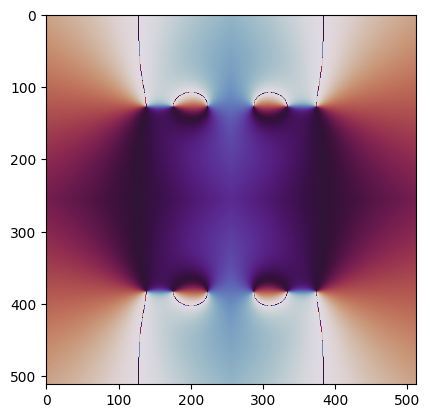

3.1
339.067790 seconds (1.22 M allocations: 7.376 GiB, 0.05% gc time, 0.58% compilation time)


In [11]:
@time begin

#check whether or not boundary conditions are periodic or not
    
n = 8
N = 2^n;
M = Int(round(N,digits = 0))
    
println(N)

r‚Çê = 15
f‚Çê = 10 .^r‚Çê;

angl = zeros(2N,2N)
    
LPQ = [125 250 500 1000 2000 4000 8000 16000 32000 64000]

üé± = [5e1 5e1 5e1 5e1 5e1 0]
üè† = [1e-2 1e-1 1e0 1e1 1e2 0]


for i ‚àà 7:7
        
    cont = 0
    low = 0
    AÃá = 0#zeros(2N,2N)

    cap = 25
    pic = 0
    poggers = 1

    #print(string(i)*" ")


    AÃá‚ÇÅ = zeros(2N,2N);
    AÃá‚ÇÇ = zeros(2N,2N);


    #ü™Ç,œÉ = 1, üé±[i];
    C‚ÇÅ = zeros(2N,2N)
    C‚ÇÇ = zeros(2N,2N)
    angll = 0
    #Make_Oscillon!(angll,ü™Ç,N,œÉ)
    #print(angll)
        
    rstr1 = zeros(M,M)
    istr1 = zeros(M,M)
    rstr2 = zeros(M,M)
    istr2 = zeros(M,M)
    rstr3 = zeros(M,M)
    istr3 = zeros(M,M)
    rstr4 = zeros(M,M)
    istr4 = zeros(M,M)
    
    Œ£ = 1
    Anti_string!(rstr1,istr1,M,Œ£, N/2  ,7N/8)
    Clock_string!(rstr2,istr2,M,Œ£, N/2,N/8)
        
        
#     Anti_2string!(rstr1,istr1,M,Œ£)
#     Clock_2string!(rstr2,istr2,M,Œ£)
        
    Anti_string!(rstr3,istr3,M,Œ£, N/2,7N/8)
    Clock_string!(rstr4,istr4,M,Œ£, N/2,N/8)

    rstr3 = rstr3[end:-1:1,:]
    istr3 = istr3[end:-1:1,:]
    rstr4 = rstr4[end:-1:1,:]
    istr4 = istr4[end:-1:1,:]

    slot!(C‚ÇÅ,rstr1,Int(N/2),Int(N/2))
    slot!(C‚ÇÇ,istr1,Int(N/2),Int(N/2))
        
    slot!(C‚ÇÅ,rstr2,Int(N/2),Int(3N/2))
    slot!(C‚ÇÇ,istr2,Int(N/2),Int(3N/2))
        
    slot!(C‚ÇÅ,rstr3,Int(3N/2),Int(N/2))
    slot!(C‚ÇÇ,istr3,Int(3N/2),Int(N/2))
        
    slot!(C‚ÇÅ,rstr4,Int(3N/2),Int(3N/2))
    slot!(C‚ÇÇ,istr4,Int(3N/2),Int(3N/2))
        
  
        
    angler!(angl,C‚ÇÅ,C‚ÇÇ) 
        
    PyPlot.imshow(angl,vmin=-œÄ,vmax = œÄ,cmap = "twilight")


    s = 6
    r = 6

    


    t‚ÇÅ = 0.1

    LQCD = LPQ/(2*100)*0.4

    Œîx = round(LQCD[6]/N,digits = 6)
    Œît = 0.001



        
    repeat = 15
        
        
    Srun_2D!(n,N,t‚ÇÅ,C‚ÇÅ,C‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeat,cont,low,AÃá,angll,poggers,cap,pic)


end
    
    

end

In [12]:
@time begin


    
n = 5
N = 2^n;
M = Int(round(N,digits = 0))
    
println(N)

r‚Çê = 15
f‚Çê = 10 .^r‚Çê;

    
    
LPQ = [125 250 500 1000 2000 4000 8000 16000 32000 64000]

üé± = [1e1 1e1 1e1 1e1 1e1 1e1]
üè† = [1e-2 1e-1 1e0 1e1 1e2 0]
st = [1 5 7]


for i ‚àà 1:3
        
    cont = 25
    low = 0
    AÃá = rand(Normal(0,1e0),2N,2N)
    #AÃá =   zeros(2N,2N)
        
    angll = ones(2N,2N)

    cap = 2
    pic = 0
    poggers = 6.68

    print(string(i)*" ")


    AÃá‚ÇÅ = zeros(2N,2N);
    AÃá‚ÇÇ = zeros(2N,2N);
    C‚ÇÅ = zeros(2N,2N)
    C‚ÇÇ = zeros(2N,2N)


    ü™Ç,œÉ = 1, üé±[i];

    angll1 = zeros(N,N)
    Make_Oscillon!(angll1,ü™Ç,N,œÉ)
    angll2 = zeros(Int(N),Int(N))
    Make_Oscillon!(angll2,ü™Ç,Int(N),œÉ)
    #print(angll)
    
        
    angll = angll * angll1[1,1]
        

    slot!(angll,angll1,Int(N),Int(N/2))
    slot!(angll,angll2,Int(N),Int(3N/2))


    s = 1
    r = 5

    
      #  save("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(ü•™)*string(i)*".jld", "Real", A‚ÇÅ,"Imaginary",A‚ÇÇ,"Realvel",AÃá‚ÇÅ,"RealIm",AÃá‚ÇÇ,"angle",angll,"AngVel",AÃá)
    #oad("PQTOWN/new/Saving/"*string(i)*"/Box"*string(n)*string(repeat)*".jld")["Real"]

    t‚ÇÅ = 1.5

    LQCD = LPQ/(2*100)*0.4

    Œîx = round(LQCD[8]/N,digits = 6)
    Œît = 0.001



        
    repeat = 35
        
        
    Orun_2D!(n,N,t‚ÇÅ,C‚ÇÅ,C‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeat,cont,low,AÃá,angll,poggers,cap,pic)


end
    
    

end

32
1 

LoadError: InterruptException:

In [9]:
@time begin


    
n = 8
N = 2^n;
M = Int(round(N,digits = 0))
    
println(N)

r‚Çê = 15
f‚Çê = 10 .^r‚Çê;

    #1e0 size, 1e-6 power
    
    
LPQ = [125 250 500 1000 2000 4000 8000 16000 32000 64000]

üé± = [1e0 1e0 1e0 1e0 5e0 1e1 1e1 1e1 5e0 5e0]
üè† = [1e-2 1e-1 1e0 1e1 1e2 0]
st = [1 5 7 7 1 7 1 7 1 7]



for i ‚àà 1:3
        
    cont = 0
    low = 0
    #AÃá = rand(Normal(0,1e-1),N,N)
    AÃá =   zeros(N,N)
        
    #angll = ones(N,N)

    cap = 25
    pic = 0
    poggers = 6.68

    print(string(i)*" ")


    AÃá‚ÇÅ = zeros(N,N);
    AÃá‚ÇÇ = zeros(N,N);
    C‚ÇÅ = zeros(N,N)
    C‚ÇÇ = zeros(N,N)


    ü™Ç,œÉ = 2e0, üé±[i];

    angll = zeros(N,N)
    Make_Oscillon!(angll,ü™Ç,N,œÉ)
#     angll2 = zeros(Int(N),Int(N))
#     Make_WOscillon!(angll2,ü™Ç,Int(N),œÉ)
    #print(angll)
    
        
    #angll = angll * angll1[1,1]
        

#     slot!(angll,angll1,Int(N),Int(N/2))
#     slot!(angll,angll2,Int(N),Int(3N/2))


    s = st[i]
    r = 1

    
#     angll = load("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(cont)*string(i)*".jld")["angle"]
#     low = load("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(cont)*string(i)*".jld")["lo"]

#     AÃá = load("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(cont)*string(i)*".jld")["AngVel"]
    t‚ÇÅ = 1.5 + cont*0.2

    LQCD = LPQ/(2*100)*0.4

    Œîx = round(LQCD[7]/N,digits = 6)
    Œît = 0.001



        
    repeat = 35
        
        
    Orun_2D!(n,N,t‚ÇÅ,C‚ÇÅ,C‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeat,cont,low,AÃá,angll,poggers,cap,pic)


end
    
    

end

256
1 1.7
1.9
2.1
2.3
2.5
2.701
2.901
3.100306406111372
3.30001428513462
3.500584328358709
3.7004961519547193
3.9000891918471448
4.100029735330848
4.300118506850442
4.500061496021261
4.700001910074325
4.900074920859946
5.100055578082287
5.300008464119165
5.500007304110302
5.700005950385252
5.900000846341929
6.10001125387469
6.300067110491822
6.500050527438882
6.700037553956347
6.900028483328479
7.10003376122721
7.300017759357692
7.5000114475655835
7.700042902871927
7.900018511343894
8.100023852528464
8.300023546685344
8.500027158661023
2 1.7
1.9
2.1
2.3
2.5
2.701
2.901
3.100306406111372
3.30001428513462
3.500584328358709
3.7004961519547193
3.9000891918471448
4.100029735330848
4.300118506850442
4.500061496021261
4.700001910074325
4.900074920859946
5.100055578082287
5.300008464119165
5.500007304110302
5.700005950385252
5.900000846341929
6.10001125387469
6.300067110491822
6.500050527438882
6.700037553956347
6.900028483328479
7.10003376122721
7.300017759357692
7.5000114475655835
7.70004290

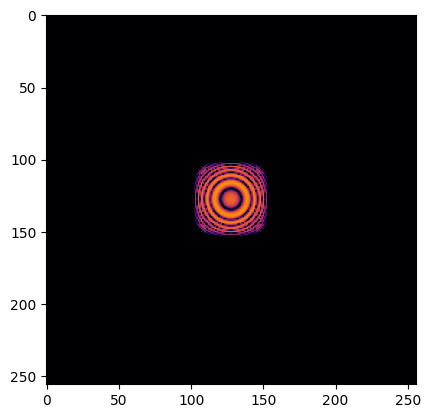

PyObject <matplotlib.image.AxesImage object at 0x7f2a1816c070>

In [12]:
  
angll = load("QCDTOWN/Oscillon/Saving/Box"*string(8)*string(35)*string(1)*".jld")["angle"]
#     low = load("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(cont)*string(i)*".jld")["lo"]

#     AÃá = load("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(cont)*string(i)*".jld")["AngVel"]



œÅ = angll.^2
rho = mean(œÅ)


#PyPlot.imshow(log.(œÅ/rho)[103:154,103:154],vmin = 0,vmax = 4,cmap = "inferno")

PyPlot.imshow(log.(œÅ/rho),vmin = 0,vmax = 6,cmap = "inferno")


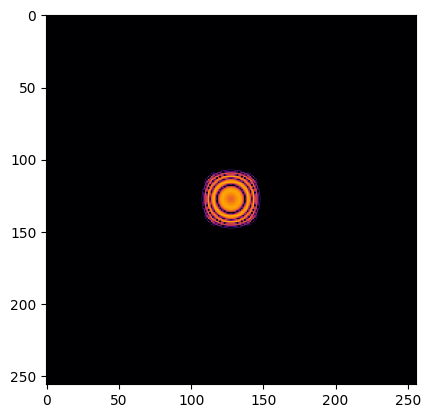

PyObject <matplotlib.image.AxesImage object at 0x7f2a181e1580>

In [13]:
angll = load("QCDTOWN/Oscillon/Saving/Box"*string(8)*string(35)*string(2)*".jld")["angle"]
#     low = load("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(cont)*string(i)*".jld")["lo"]

#     AÃá = load("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(cont)*string(i)*".jld")["AngVel"]



œÅ = angll.^2
rho = mean(œÅ)


#PyPlot.imshow(log.(œÅ/rho)[109:148,109:148],vmin = 0,vmax = 4,cmap = "inferno")

PyPlot.imshow(log.(œÅ/rho),vmin = 0,vmax = 6,cmap = "inferno")

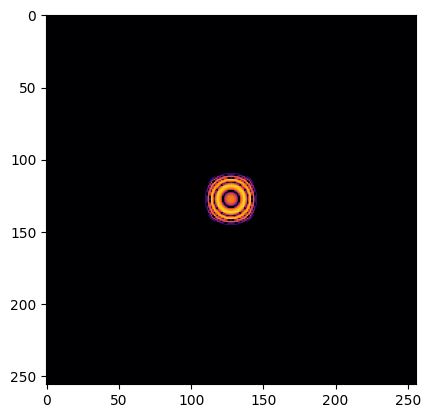

PyObject <matplotlib.image.AxesImage object at 0x7f2a18144460>

In [14]:
angll = load("QCDTOWN/Oscillon/Saving/Box"*string(8)*string(35)*string(3)*".jld")["angle"]
#     low = load("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(cont)*string(i)*".jld")["lo"]

#     AÃá = load("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(cont)*string(i)*".jld")["AngVel"]



œÅ = angll.^2
rho = mean(œÅ)


#PyPlot.imshow(log.(œÅ/rho)[111:146,111:146],vmin = 0,vmax = 4,cmap = "inferno")


PyPlot.imshow(log.(œÅ/rho),vmin = 0,vmax = 6,cmap = "inferno")

In [12]:

# save("QCDTOWN/Oscillon/Saving/Box"*string(n)*string(ü•™)*string(i)*".jld", "Real", A‚ÇÅ,"Imaginary",A‚ÇÇ,"Realvel",AÃá‚ÇÅ,"RealIm",AÃá‚ÇÇ,"angle",angll,"AngVel",AÃá)
# save("QCDTOWN/Oscillon/Saving/MinMax"*string(n)*string(ü•™)*string(i)*".jld", "max", axionmax,"min",axionmin, "Fmax", Fmax, "Fmin", Fmin, "Fmed", Fmed)



# save("QCDTOWN/Oscillon/Saving/Strings"*string(n)*string(ü•™)*string(i)*".jld","time",tracker,"number",cores,"lo",lo)
# save("QCDTOWN/Oscillon/Saving/FFT"*string(n)*string(ü•™)*string(i)*".jld","saxion",saxion,"axion",axion,"axenergy",axenergy)
t = load("QCDTOWN/Oscillon/Saving/Strings9259.jld")["time"]

Fmin = load("QCDTOWN/Oscillon/Saving/MinMax9259.jld")["Fmin"]
Fmax = load("QCDTOWN/Oscillon/Saving/MinMax9259.jld")["Fmax"]
Fmed = load("QCDTOWN/Oscillon/Saving/MinMax9259.jld")["Fmed"]

Plots.plot(t,Fmin)
Plots.plot!(t,Fmax)
Plots.plot!(t,Fmed)

LoadError: DomainError with -59.064664417802156:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

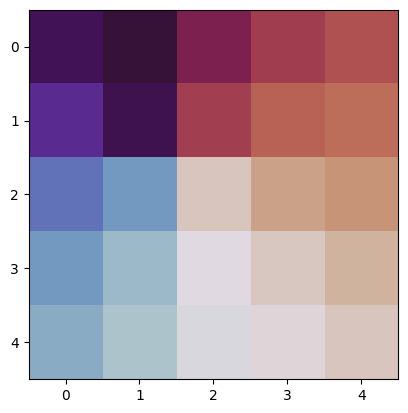

PyObject <matplotlib.image.AxesImage object at 0x7f9655ee25b0>

In [102]:
   C‚ÇÅ = load("QCDTOWN/rs/Saving/1/1/1/Box910.jld")["Real"]
    C‚ÇÇ = load("QCDTOWN/rs/Saving/1/1/1/Box910.jld")["Imaginary"]
    angler!(angl,C‚ÇÅ,C‚ÇÇ) 
    PyPlot.imshow(angl[436:440,96:100],vmin=-œÄ,vmax = œÄ,cmap = "twilight")

#             A1[22:26,215:219] = ones(5,5)
#    A2[22:26,215:219] = zeros(5,5)
#     A1[426:430,35:39] = ones(5,5)
#     A2[426:430,35:39] = zeros(5,5)
#     A1[77:81,201:205] = ones(5,5)
#     A2[77:81,201:205] = zeros(5,5)
#     A1[436:440,96:100] = ones(5,5)
#     A2[436:440,96:100] = zeros(5,5)



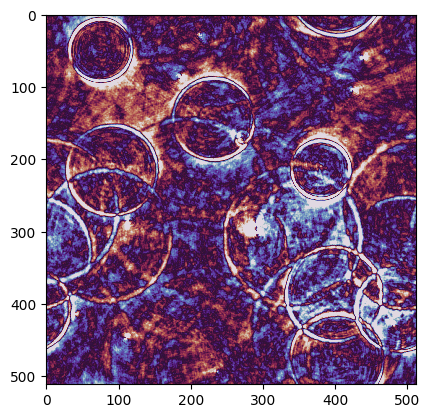

PyObject <matplotlib.image.AxesImage object at 0x7f95f9fdd970>

In [62]:
B = load("QCDTOWN/rs/Saving/1/1/1/Box910.jld")["AngVel"]

PyPlot.imshow(B,vmin=-œÄ,vmax = œÄ,cmap = "twilight")


In [13]:
@time begin


    
n = 9
N = 2^n;
println(N)

r‚Çê = 15
f‚Çê = 10 .^r‚Çê;
r = 1
s = 1
    
    
    
LPQ = [125 250 500 1000 2000 4000 8000 16000 32000 64000]
angl = zeros(N,N)
    


for i ‚àà 1:1
        
    cont = 0
    low = 0
    AÃá = 0

    cap = 1
    angll = 0
    pic = 0
    poggers = 1

    t‚ÇÄ = 0.0001;
    print(string(i)*" ")


    AÃá‚ÇÅ = zeros(N,N);
    AÃá‚ÇÇ = zeros(N,N);


    Œº,œÉ = 0, 0.1;
    C‚ÇÅ = rand(Normal(Œº,œÉ),N,N);
    C‚ÇÇ = rand(Normal(Œº,œÉ),N,N);


    Œîx = round(LPQ[6]/N,digits = 4)
    Œît = 0.004
    
        

    #FPQrun_2D!(n, N, t‚ÇÄ, C‚ÇÅ, C‚ÇÇ, »¶‚ÇÅ, »¶‚ÇÇ, Œîx, Œît,f‚Çê,i,repeat,cont,low)
        

    s = 1
    r = 1

    repeat = 2

    C‚ÇÅ = load("QCDTOWN/Saving/5/Box9211.jld")["Real"]
    C‚ÇÇ = load("QCDTOWN/Saving/5/Box9211.jld")["Imaginary"]
    
    

#     C‚ÇÅ = load("PQTOWN/new/Saving/"*string(i)*"/Box"*string(n)*string(repeat)*".jld")["Real"]
#     C‚ÇÇ = load("PQTOWN/new/Saving/"*string(i)*"/Box"*string(n)*string(repeat)*".jld")["Imaginary"]
#     AÃá‚ÇÅ = load("PQTOWN/new/Saving/"*string(i)*"/Box"*string(n)*string(repeat)*".jld")["Realvel"]
#     AÃá‚ÇÇ = load("PQTOWN/new/Saving/"*string(i)*"/Box"*string(n)*string(repeat)*".jld")["RealIm"]

    t‚ÇÅ = 0.4

    LQCD = LPQ/(repeat*100)*0.4

    Œîx = round(LQCD[6]/N,digits = 6)
    Œît = 0.001

    repeat = 2
    
    
    angler!(angl,C‚ÇÅ,C‚ÇÇ)    
        
    PyPlot.imshow(angl,vmin=-œÄ,vmax = œÄ,cmap = "twilight")

    Real1 = C‚ÇÅ[185:215,250:280]
    Im1 = C‚ÇÇ[185:215,250:280]
    osc1 = zeros(length(Real1[:,1]),length(Real1[1,:]))
    angler!(osc1,Real1,Im1)
    PyPlot.imshow(osc1,vmin=-œÄ,vmax = œÄ,cmap = "twilight")

    #FErun_2D!(n,N,t‚ÇÅ,C‚ÇÅ,C‚ÇÇ,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeat,cont,low,AÃá,angll,poggers,cap,pic)

    Real2 = C‚ÇÅ[260:290,300:330]
    Im2 = C‚ÇÇ[260:290,300:330]
    osc2 = zeros(length(Real2[:,1]),length(Real2[1,:]))
    angler!(osc2,Real2,Im2)
    PyPlot.imshow(osc2,vmin=-œÄ,vmax = œÄ,cmap = "twilight")

    A1 = rand(Normal(1,0.1),N,N);
    A2 = rand(Normal(0,0.1),N,N);
        
    A1[185:215,250:280] = Real1
    A2[185:215,250:280] = Im1
    
    A1[260:290,300:330] = Real2
    A2[260:290,300:330] = Im2
    
    
    ang = zeros(N,N)
    angler!(ang,A1,A2)
    
    PyPlot.imshow(ang,vmin=-œÄ,vmax = œÄ,cmap = "twilight")
        
    AÃá‚ÇÅ,AÃá‚ÇÇ = zeros(N,N),zeros(N,N)
        
    Orun_2D!(n,N,t‚ÇÅ,A1,A2,AÃá‚ÇÅ,AÃá‚ÇÇ,Œîx,Œît,f‚Çê,i,r,s,repeat,cont,low,AÃá,angll,poggers,cap,pic)


end
    
    

end

512
1 

LoadError: InterruptException:

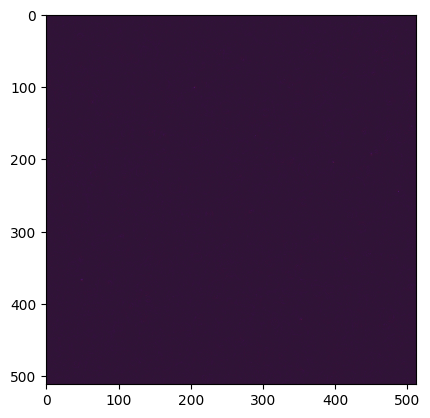

PyObject <matplotlib.image.AxesImage object at 0x7f9655e26d30>

In [21]:
B = load("QCDTOWN/Saving/5/Box9111.jld")["AngVel"]

PyPlot.imshow(B,vmin=-œÄ,vmax = œÄ,cmap = "twilight")

